In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('transformed_data.csv', index_col='id', parse_dates=['date'])
df.head()

,Unnamed: 0,date,party,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8
id,,,,,,,,,,,,
DE-0190001007,0,2017-10-24,DIE LINKE,0.045224,0.236738,0.000434,0.489914,0.000434,0.000434,0.000434,0.000434,0.225953
DE-0190001008,1,2017-10-24,CDU/CSU,0.000393,0.430017,0.000393,0.347548,0.000393,0.009565,0.000393,0.063217,0.148081
DE-0190001010,2,2017-10-24,BÜNDNIS 90/DIE GRÜNEN,0.000389,0.526916,0.000389,0.470363,0.000389,0.000389,0.000389,0.000389,0.000389
DE-0190002005,3,2017-11-21,CDU/CSU,0.055482,0.398606,0.000545,0.542642,0.000545,0.000545,0.000545,0.000545,0.000545
DE-0190002015,4,2017-11-21,AfD,0.818973,0.000415,0.000415,0.000415,0.000415,0.156425,0.000415,0.000415,0.022113


In [61]:
df.drop(columns=['Unnamed: 0'], inplace=True)

## Summary statistics

In [62]:
df.describe()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8
count,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000,8470.000000
mean,0.065502,0.201153,0.101659,0.076906,0.146444,0.082846,0.105911,0.078249,0.141329
std,0.180951,0.252742,0.187107,0.174927,0.248160,0.161265,0.187799,0.175664,0.226380
min,0.000123,0.000104,0.000123,0.000123,0.000158,0.000143,0.000150,0.000143,0.000161
25%,0.000396,0.000515,0.000445,0.000416,0.000445,0.000434,0.000434,0.000420,0.000465
50%,0.000520,0.093917,0.000682,0.000567,0.000691,0.000611,0.000695,0.000562,0.003587
75%,0.004668,0.329529,0.124619,0.057625,0.183981,0.080036,0.133348,0.052082,0.192784
max,0.998621,0.997616,0.997647,0.998437,0.998406,0.996231,0.997872,0.997368,0.997927


In [63]:
df['party'].value_counts()

CDU/CSU                  2101
SPD                      1547
AfD                      1285
BÜNDNIS 90/DIE GRÜNEN    1188
FDP                      1186
DIE LINKE                1163
Name: party, dtype: int64

In [64]:
df[['date', 'party']].groupby('party')['date'].nunique()

party
AfD                      198
BÜNDNIS 90/DIE GRÜNEN    193
CDU/CSU                  203
DIE LINKE                190
FDP                      189
SPD                      195
Name: date, dtype: int64

## Topics

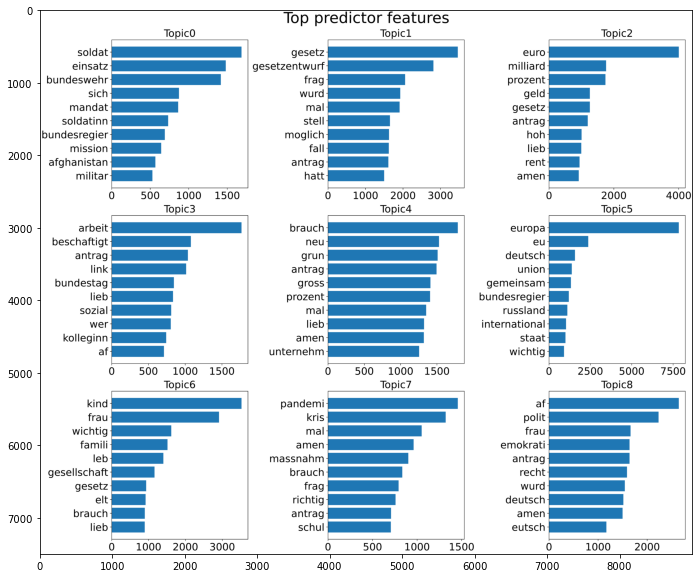

In [65]:
from pdf2image import convert_from_path
img = convert_from_path('topics_words.pdf', 500)[0]
fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(img)

In [ ]:
columns_mapper = {
    'Topic0': 'Military',
    'Topic1': 'Law',
    'Topic2': 'Economy',
    'Topic3': 'Work',
    'Topic4': 'Empty1',
    'Topic5': 'International',
    'Topic6': 'Family/Education',
    'Topic7': 'Health/Pandemic',
    'Topic8': 'Empty2',
}

## Grouped parties

In [41]:
grouped_df = df.groupby('date').mean()

In [42]:
n_topics = len(grouped_df.columns)

In [43]:
n_days = 10
rolling_df = grouped_df.rolling(n_days).mean().tail(-n_days)

In [44]:
rolling_df

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8
date,,,,,,,,,
2018-02-02,0.126655,0.138657,0.105395,0.062158,0.091316,0.161485,0.092174,0.034698,0.187463
2018-02-21,0.096910,0.134559,0.098943,0.056090,0.075191,0.146522,0.101363,0.033579,0.256843
2018-02-22,0.069576,0.146394,0.096987,0.062648,0.095946,0.139616,0.103966,0.030585,0.254282
2018-02-23,0.050100,0.141715,0.101511,0.057485,0.088568,0.143768,0.121498,0.029860,0.265495
2018-02-28,0.053810,0.130555,0.102444,0.047669,0.088860,0.185481,0.118536,0.027716,0.244930
...,...,...,...,...,...,...,...,...,...
2021-06-11,0.077084,0.210255,0.095192,0.066271,0.123271,0.052938,0.107941,0.090343,0.176705
2021-06-23,0.093250,0.222088,0.085104,0.055728,0.117537,0.051159,0.118716,0.082744,0.173674
2021-06-24,0.101776,0.213902,0.078324,0.055405,0.112540,0.057419,0.128481,0.078655,0.173498


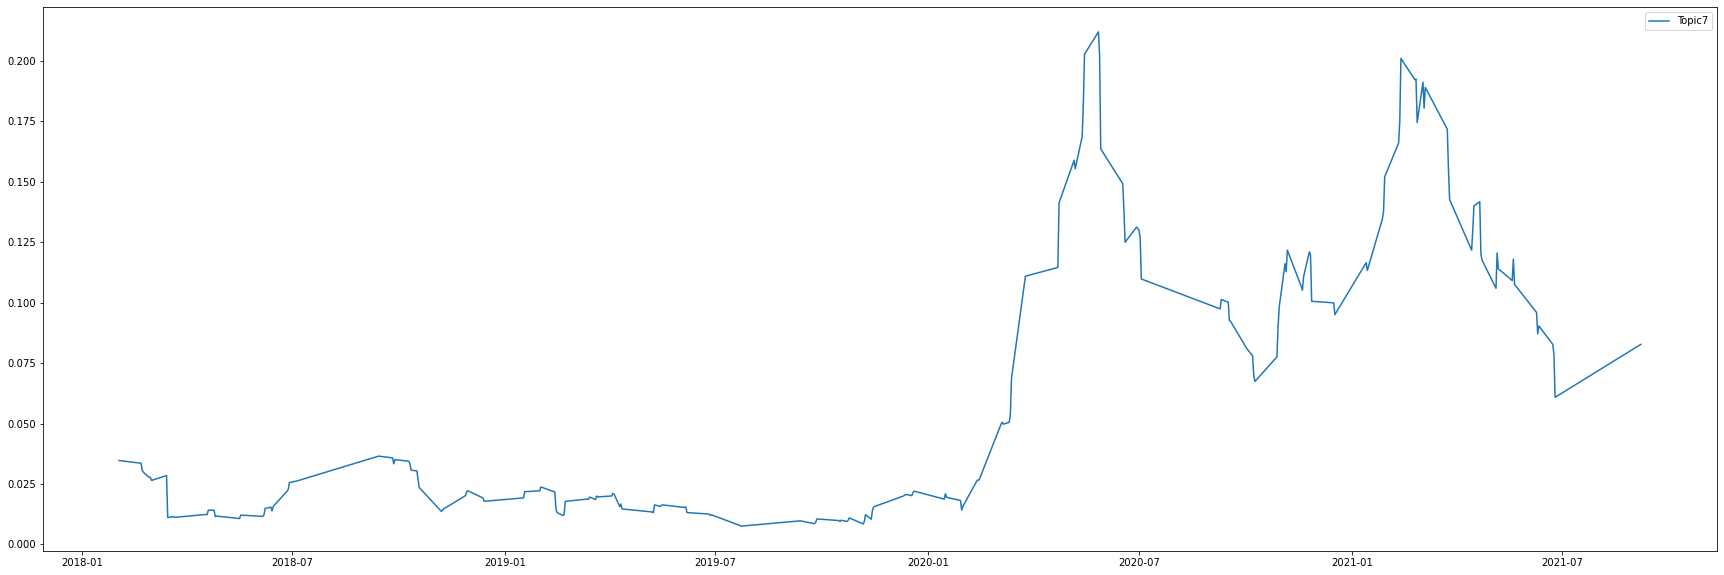

In [15]:
fig, ax = plt.subplots(figsize=(30, 10))

for topic_col in rolling_df.columns:
    if topic_col[-1] == '7':
        ax.plot(rolling_df.index.values, rolling_df[topic_col].values, label=topic_col)
ax.legend()

## Parties differences

In [16]:
df.groupby('party').mean()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8
party,,,,,,,,,
AfD,0.066659,0.209473,0.106068,0.047289,0.138282,0.074300,0.068498,0.067119,0.222312
BÜNDNIS 90/DIE GRÜNEN,0.074644,0.201493,0.084750,0.068923,0.159242,0.076010,0.120694,0.078304,0.135940
CDU/CSU,0.072607,0.240798,0.084927,0.048165,0.132255,0.086976,0.137664,0.074922,0.121686
DIE LINKE,0.065066,0.186660,0.118876,0.110751,0.130498,0.074347,0.086728,0.059731,0.167343
FDP,0.067308,0.231635,0.099634,0.064430,0.152466,0.079742,0.108415,0.081180,0.115190
SPD,0.060503,0.214673,0.092859,0.070445,0.139124,0.071355,0.144218,0.074015,0.132807
